In [15]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# from scipy.stats import randint
from sklearn.ensemble import HistGradientBoostingRegressor as hgboost
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
from dask.distributed import Client, LocalCluster 
import joblib

In [34]:
cluster = LocalCluster()  
client = Client(cluster)  

In [35]:
print(client.dashboard_link)

http://127.0.0.1:54264/status


In [4]:
pd.set_option('display.max_columns', None)

In [18]:
df_ny = pd.read_parquet('../data/ML_Data/NY',  engine='pyarrow')
df_fl = pd.read_parquet('../data/ML_Data/FL',  engine='pyarrow')
df_ca = pd.read_parquet('../data/ML_Data/CA', engine='pyarrow')
df_tx =pd.read_parquet('../data/ML_Data/TX', engine='pyarrow')
# energy_df = pd.read_parquet('../data/energy_generation.parquet', engine='pyarrow')

In [6]:
df_ny.shape

(68848, 85)

In [26]:
# df_ny.columns[26:84]

In [27]:
# df_ny['weekend'] = np.where(df_ny['days'].isin([0,7]), 1, 0)
# df_tx['weekend'] = np.where(df_tx['days'].isin([0,7]), 1, 0)
# df_ca['weekend'] = np.where(df_ca['days'].isin([0,7]), 1, 0)
# df_fl['weekend'] = np.where(df_fl['days'].isin([0,7]), 1, 0)

In [19]:
TARGET = 'value'
FEATURES = df_ny.columns[2:]

In [20]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [21]:
# loss = ['quantile']
# quantile = [float(x) for x in np.linspace(0.65, 0.8, num = 10)]
# learning_rate = [float(x) for x in np.linspace(0.1, .05, num = 5)]
# max_iter = [int(x) for x in np.linspace(400, 500, num = 5)]
# max_leaf_nodes = [int(x) for x in np.linspace(30, 60, num = 10)]
# min_samples_leaf = [2, 3, 4]

In [22]:
# tss = TimeSeriesSplit(n_splits=3, test_size=24*547, gap=24)
# for train_idx, val_idx in tss.split(df_tx):
#     train = df_tx.iloc[train_idx]
#     test = df_tx.iloc[val_idx]
#     X_train = train[FEATURES]
#     y_train = train[TARGET]
#     X_test = test[FEATURES]
#     y_test = test[TARGET]
#     regr = hgboost()
#     random_grid = {'loss': loss,
#             'quantile': quantile,
#             'learning_rate' : learning_rate,
#             'max_iter': max_iter,
#             'max_leaf_nodes': max_leaf_nodes,
#             'min_samples_leaf': min_samples_leaf,
#             }
#     rf_random = HalvingRandomSearchCV(estimator = regr, param_distributions = random_grid, cv = 3, verbose=2, random_state=7, n_jobs = -1)
#     # Fit the random search model
#     with joblib.parallel_backend('dask'):
#         rf_random.fit(X_train, y_train)
#     print(f'''===================================================
# {rf_random.best_params_}''')

n_iterations: 8
n_required_iterations: 8
n_possible_iterations: 8
min_resources_: 6
max_resources_: 29395
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 4899
n_resources: 6
Fitting 3 folds for each of 4899 candidates, totalling 14697 fits
----------
iter: 1
n_candidates: 1633
n_resources: 18
Fitting 3 folds for each of 1633 candidates, totalling 4899 fits
----------
iter: 2
n_candidates: 545
n_resources: 54
Fitting 3 folds for each of 545 candidates, totalling 1635 fits
----------
iter: 3
n_candidates: 182
n_resources: 162
Fitting 3 folds for each of 182 candidates, totalling 546 fits
----------
iter: 4
n_candidates: 61
n_resources: 486
Fitting 3 folds for each of 61 candidates, totalling 183 fits
----------
iter: 5
n_candidates: 21
n_resources: 1458
Fitting 3 folds for each of 21 candidates, totalling 63 fits
----------
iter: 6
n_candidates: 7
n_resources: 4374
Fitting 3 folds for each of 7 candidates, totalling 21 fits
----------
iter: 7
n_candidates: 3
n_re

In [36]:
# from sklearn.experimental import enable_halving_search_cv
# from sklearn.model_selection import HalvingGridSearchCV

In [37]:
# param_grid = {'loss' : ['quantile'],
#     'quantile' : [0.75, 0.8, 0.85],
#     'max_iter' : [433, 450],
#     'learning_rate' : [0.05, 0.1], 
#     'max_leaf_nodes' : [60, 70, 80, 90],
# }

# for train_idx, val_idx in tss.split(df_tx):
#         train = df_tx.iloc[train_idx]
#         test = df_tx.iloc[val_idx]
#         X_train = train[FEATURES]
#         y_train = train[TARGET]
#         X_test = test[FEATURES]
#         y_test = test[TARGET]
#         regr = hgboost()
#         grid_search = HalvingGridSearchCV(estimator = regr, param_grid = param_grid, n_jobs=-1,
#                           cv = 3, verbose = 2, random_state = 7)
#         with joblib.parallel_backend('dask'):
#             grid_search.fit(X_train, y_train)
#         print(f'''===================================================
#  {grid_search.best_params_}''')

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 1088
max_resources_: 29395
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 48
n_resources: 1088
Fitting 3 folds for each of 48 candidates, totalling 144 fits


2023-05-12 23:48:56,452 - bokeh.application.handlers.function - ERROR - '<' not supported between instances of 'NoneType' and 'tuple'
Traceback (most recent call last):
  File "c:\Users\edwar\anaconda3\lib\site-packages\distributed\utils.py", line 784, in wrapper
    return func(*args, **kwargs)
  File "c:\Users\edwar\anaconda3\lib\site-packages\distributed\dashboard\components\scheduler.py", line 3894, in graph_doc
    graph = TaskGraph(scheduler, sizing_mode="stretch_both")
  File "c:\Users\edwar\anaconda3\lib\site-packages\distributed\dashboard\components\scheduler.py", line 2076, in __init__
    self.layout = GraphLayout(scheduler)
  File "c:\Users\edwar\anaconda3\lib\site-packages\distributed\diagnostics\graph_layout.py", line 41, in __init__
    self.update_graph(
  File "c:\Users\edwar\anaconda3\lib\site-packages\distributed\diagnostics\graph_layout.py", line 51, in update_graph
    stack = sorted(tasks, key=lambda k: priority.get(k, 0), reverse=True)
TypeError: '<' not supporte

----------
iter: 1
n_candidates: 16
n_resources: 3264
Fitting 3 folds for each of 16 candidates, totalling 48 fits
----------
iter: 2
n_candidates: 6
n_resources: 9792
Fitting 3 folds for each of 6 candidates, totalling 18 fits
----------
iter: 3
n_candidates: 2
n_resources: 29376
Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'learning_rate': 0.05, 'loss': 'quantile', 'max_iter': 450, 'max_leaf_nodes': 60, 'quantile': 0.75}
n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 1574
max_resources_: 42523
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 48
n_resources: 1574
Fitting 3 folds for each of 48 candidates, totalling 144 fits
----------
iter: 1
n_candidates: 16
n_resources: 4722
Fitting 3 folds for each of 16 candidates, totalling 48 fits
----------
iter: 2
n_candidates: 6
n_resources: 14166
Fitting 3 folds for each of 6 candidates, totalling 18 fits
----------
iter: 3
n_candidates: 2
n_resources: 42498
Fitting 3 

2023-05-13 00:10:44,031 - bokeh.core.property.validation - ERROR - 'batch_of__fit_and_score_1_calls'
Traceback (most recent call last):
  File "c:\Users\edwar\anaconda3\lib\site-packages\distributed\utils.py", line 784, in wrapper
    return func(*args, **kwargs)
  File "c:\Users\edwar\anaconda3\lib\site-packages\distributed\dashboard\components\scheduler.py", line 2437, in update_layout
    order = dask.order.order(
  File "c:\Users\edwar\anaconda3\lib\site-packages\dask\order.py", line 117, in order
    metrics = graph_metrics(dependencies, dependents, total_dependencies)
  File "c:\Users\edwar\anaconda3\lib\site-packages\dask\order.py", line 888, in graph_metrics
    val = total_dependencies[key]
KeyError: 'batch_of__fit_and_score_1_calls'
2023-05-13 00:10:44,212 - bokeh.util.tornado - ERROR - Error thrown from periodic callback:
2023-05-13 00:10:44,215 - bokeh.util.tornado - ERROR - Traceback (most recent call last):
  File "c:\Users\edwar\anaconda3\lib\site-packages\tornado\gen.py

{'learning_rate': 0.1, 'loss': 'quantile', 'max_iter': 450, 'max_leaf_nodes': 90, 'quantile': 0.75}
n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 2061
max_resources_: 55651
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 48
n_resources: 2061
Fitting 3 folds for each of 48 candidates, totalling 144 fits
----------
iter: 1
n_candidates: 16
n_resources: 6183
Fitting 3 folds for each of 16 candidates, totalling 48 fits
----------
iter: 2
n_candidates: 6
n_resources: 18549
Fitting 3 folds for each of 6 candidates, totalling 18 fits
----------
iter: 3
n_candidates: 2
n_resources: 55647
Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'learning_rate': 0.1, 'loss': 'quantile', 'max_iter': 433, 'max_leaf_nodes': 60, 'quantile': 0.75}


{'quantile': 0.8, 'min_samples_leaf': 2, 'max_leaf_nodes': 536, 'max_iter': 433, 'loss': 'quantile'}

{'learning_rate': 0.1, 'loss': 'quantile', 'max_iter': 433, 'max_leaf_nodes': 60, 'quantile': 0.75}

{'quantile': 0.6833333333333333, 'min_samples_leaf': 2, 'max_leaf_nodes': 50, 'max_iter': 425, 'loss': 'quantile', 'learning_rate': 0.1}

In [28]:
def hgboost_tree_train(df, week):
    tss = TimeSeriesSplit(n_splits=3, test_size=24*547, gap=24)
    df = df.sort_index()
    fold = 0
    preds = []
    scores_rmse = []
    scores_mae = []
    for train_idx, val_idx in tss.split(df):
        train = df.iloc[train_idx]
        test = df.iloc[val_idx]
        X_train = train[FEATURES]
        y_train = train[TARGET]
        X_test = test[FEATURES]
        y_test = test[TARGET]
        regr = hgboost(loss='quantile',
                    quantile = 0.75,
                    max_iter = 433,
                    learning_rate = 0.1, 
                    max_leaf_nodes = 60,
                    # max_depth = None,
                    min_samples_leaf = 2,  
                    # categorical_features= df.columns[26:84],
                    # l2_regularization = True,
                    # interaction_cst= 'pairwise',  
                    # early_stopping = False,                                                  
                    random_state = 7,  
                    verbose = 3,            
                    )
        regr.fit(X_train, y_train)
        y_pred = regr.predict(X_test)
        preds.append(y_pred)
        score_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        scores_rmse.append(score_rmse)
        scores_mae.append(mean_absolute_error(y_test,y_pred))
    print(f'Score across folds(mse): {np.mean(scores_rmse):0.4f}')
    print(f'Fold scores(mse):{scores_rmse}')
    print(f'Score across folds(mae): {np.mean(scores_mae):0.4f}')
    print(f'Fold scores(mae):{scores_mae}')
    if week is None:
        week = ['03-01-2023', '03-07-2023']
    test['prediction'] = regr.predict(X_test)
    df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
    ax = df[['value']].plot(figsize=(15, 6))
    df['prediction'].plot(ax=ax, style='.')
    plt.legend(['Actual', 'Predicted'],loc='upper right')
    ax.set_title('Actual VS. Predicted')
    plt.show()
    
    ax = df.loc[(df.index > week[0]) & (df.index < week[1])]['value'] \
    .plot(figsize=(15, 6), title='Week Of Data')
    df.loc[(df.index > week[0]) & (df.index < week[1])]['prediction'] \
        .plot()
    plt.legend(['Actual','Predicted'],loc='upper right')
    plt.show()
    # print(df.head())
    return regr, X_test, test

In [29]:
# def create_importance(regr):
#     fi = pd.DataFrame(data = regr.n_features_in_,
#     index = regr.feature_names_in_,
#     columns = ['importance'])
#     fi.sort_values('importance').plot(kind='barh', title='Feature Importance',)
#     plt.show()

In [30]:
def create_importance(regr):
    print(f'number of features seen during fit: {regr.n_features_in_}')

In [31]:
def run_model(df, week_list=None):    
    if week_list == None:
        week = ['03-01-2023', '03-07-2023']
    else:
        week = week_list
    regr, X_test, test = hgboost_tree_train(df, week)
    # create_graphs(df,X_test=X_test, test=test, week=week)
    create_importance(regr)

```
hgboost(loss='quantile',
                    quantile = 0.75,
                    max_iter = 433,
                    learning_rate = 0.1, 
                    max_leaf_nodes = 60,
                    # max_depth = None,
                    min_samples_leaf = 2,  
                    # categorical_features= df.columns[26:84],
                    # l2_regularization = True,
                    # interaction_cst= 'pairwise',  
                    # early_stopping = False,                                                  
                    random_state = 7,  
                    verbose = 3,            
                    )
                    ```

Binning 0.018 GB of training data: 0.099 s
Binning 0.002 GB of validation data: 0.008 s
Fitting gradient boosted rounds:
[1/433] 1 tree, 60 leaves, max depth = 9, train loss: 3222.60242, val loss: 3201.76485, in 0.065s
[2/433] 1 tree, 60 leaves, max depth = 9, train loss: 2929.83792, val loss: 2914.98379, in 0.066s
[3/433] 1 tree, 60 leaves, max depth = 9, train loss: 2671.86093, val loss: 2659.13353, in 0.063s
[4/433] 1 tree, 60 leaves, max depth = 9, train loss: 2448.68863, val loss: 2439.78785, in 0.067s
[5/433] 1 tree, 60 leaves, max depth = 8, train loss: 2250.06170, val loss: 2245.01271, in 0.058s
[6/433] 1 tree, 60 leaves, max depth = 9, train loss: 2074.44366, val loss: 2072.95755, in 0.067s
[7/433] 1 tree, 60 leaves, max depth = 9, train loss: 1915.75325, val loss: 1919.32411, in 0.083s
[8/433] 1 tree, 60 leaves, max depth = 8, train loss: 1780.56548, val loss: 1787.82445, in 0.057s
[9/433] 1 tree, 60 leaves, max depth = 10, train loss: 1659.62491, val loss: 1668.22595, in 0.0

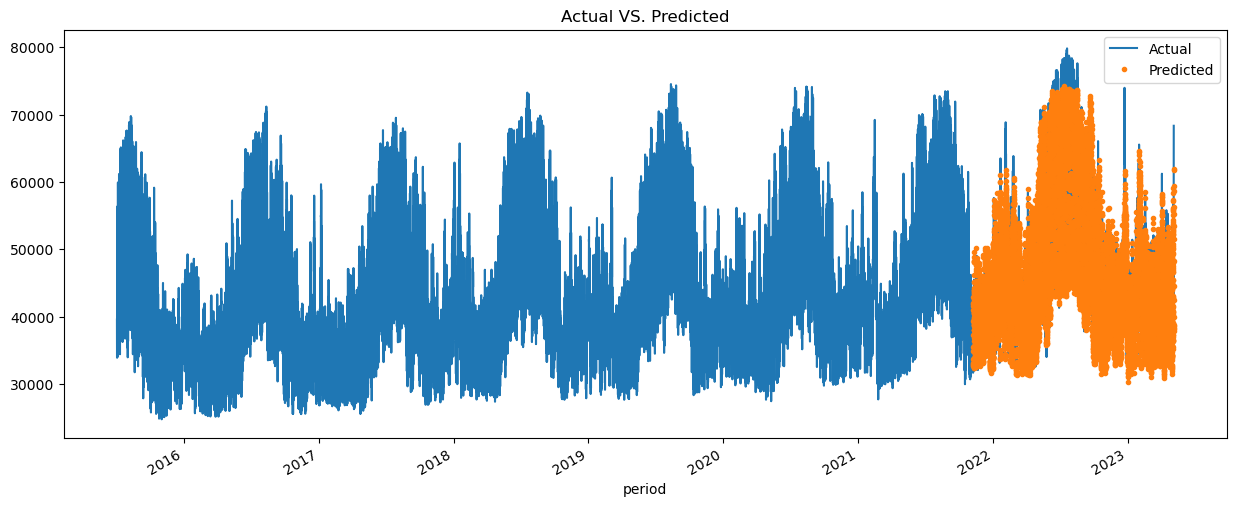

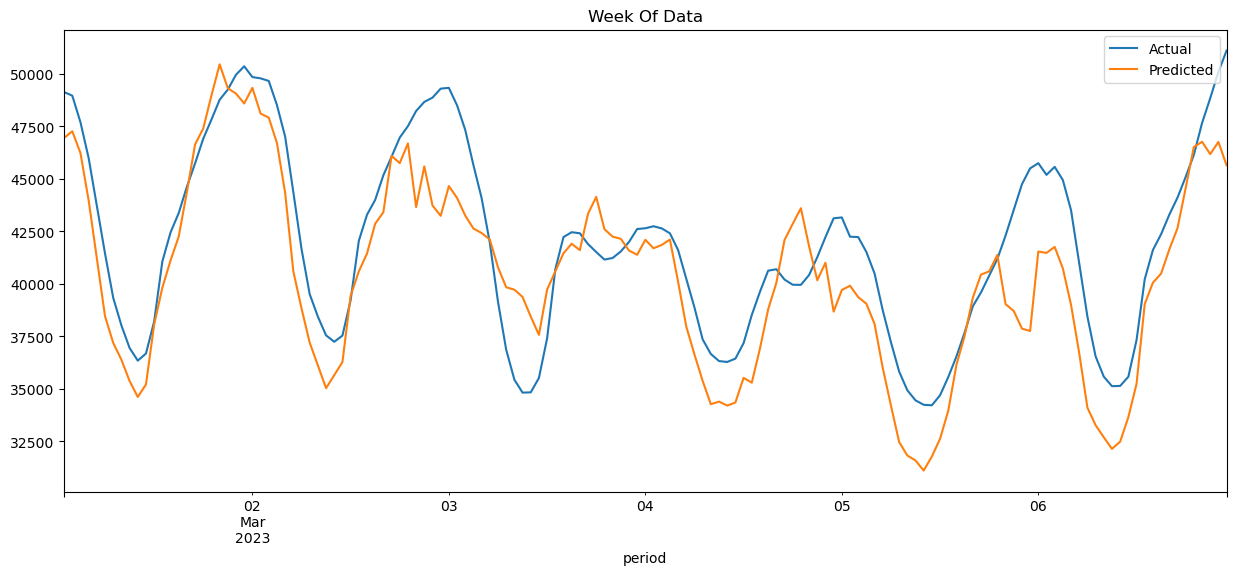

number of features seen during fit: 83


In [32]:
mod_tx = run_model(df_tx)

Binning 0.018 GB of training data: 0.083 s
Binning 0.002 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
[1/433] 1 tree, 60 leaves, max depth = 8, train loss: 1087.38827, val loss: 1099.98403, in 0.080s
[2/433] 1 tree, 60 leaves, max depth = 9, train loss: 997.37092, val loss: 1010.74755, in 0.070s
[3/433] 1 tree, 60 leaves, max depth = 11, train loss: 920.81883, val loss: 933.65670, in 0.066s
[4/433] 1 tree, 60 leaves, max depth = 11, train loss: 851.71847, val loss: 865.77013, in 0.052s
[5/433] 1 tree, 60 leaves, max depth = 11, train loss: 791.29432, val loss: 806.09728, in 0.052s
[6/433] 1 tree, 60 leaves, max depth = 10, train loss: 738.14349, val loss: 753.18732, in 0.072s
[7/433] 1 tree, 60 leaves, max depth = 11, train loss: 690.63127, val loss: 705.64833, in 0.068s
[8/433] 1 tree, 60 leaves, max depth = 11, train loss: 642.72757, val loss: 657.38593, in 0.059s
[9/433] 1 tree, 60 leaves, max depth = 9, train loss: 606.01794, val loss: 621.10080, in 0.088s
[10/43

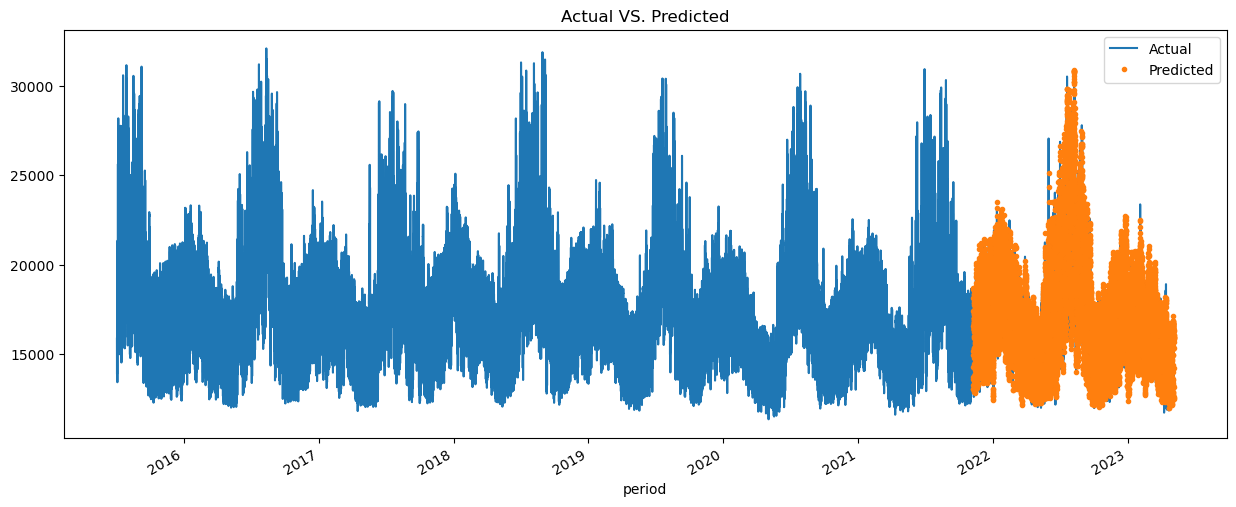

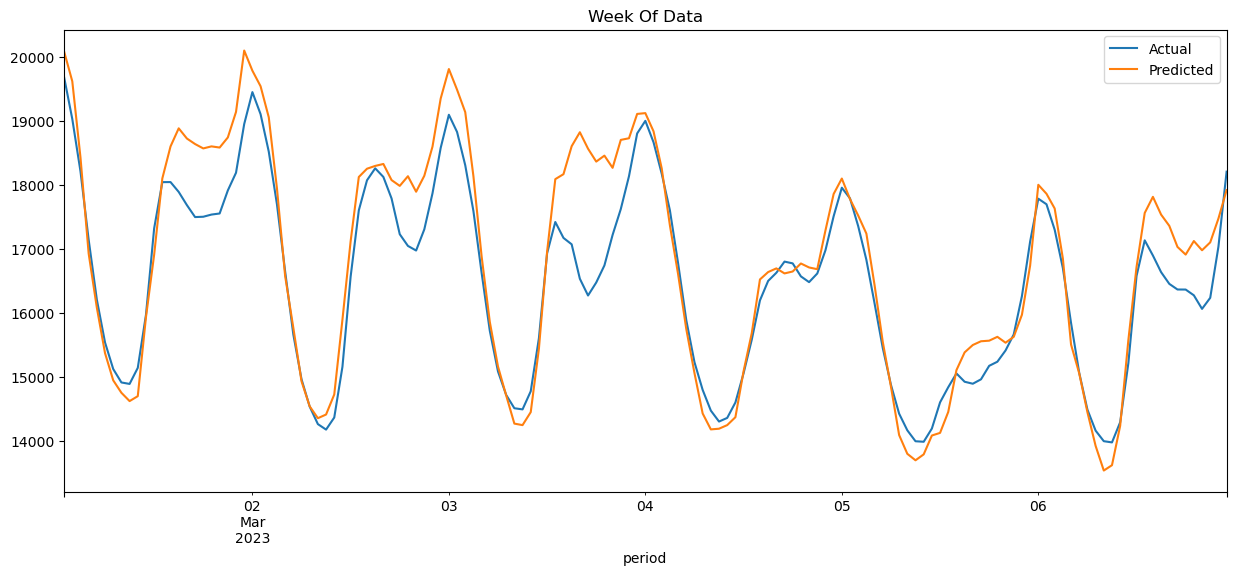

number of features seen during fit: 83


In [33]:
mod_ny = run_model(df_ny)

Binning 0.018 GB of training data: 0.092 s
Binning 0.002 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
[1/433] 1 tree, 60 leaves, max depth = 10, train loss: 2295.23132, val loss: 2285.69328, in 0.091s
[2/433] 1 tree, 60 leaves, max depth = 11, train loss: 2098.72621, val loss: 2091.89925, in 0.052s
[3/433] 1 tree, 60 leaves, max depth = 9, train loss: 1924.49233, val loss: 1917.02332, in 0.053s
[4/433] 1 tree, 60 leaves, max depth = 10, train loss: 1771.15069, val loss: 1763.82698, in 0.114s
[5/433] 1 tree, 60 leaves, max depth = 9, train loss: 1630.78687, val loss: 1625.01231, in 0.063s
[6/433] 1 tree, 60 leaves, max depth = 9, train loss: 1508.83761, val loss: 1504.50164, in 0.066s
[7/433] 1 tree, 60 leaves, max depth = 11, train loss: 1400.17417, val loss: 1397.26919, in 0.071s
[8/433] 1 tree, 60 leaves, max depth = 9, train loss: 1303.44384, val loss: 1303.03926, in 0.090s
[9/433] 1 tree, 60 leaves, max depth = 9, train loss: 1217.01017, val loss: 1220.05348, in 

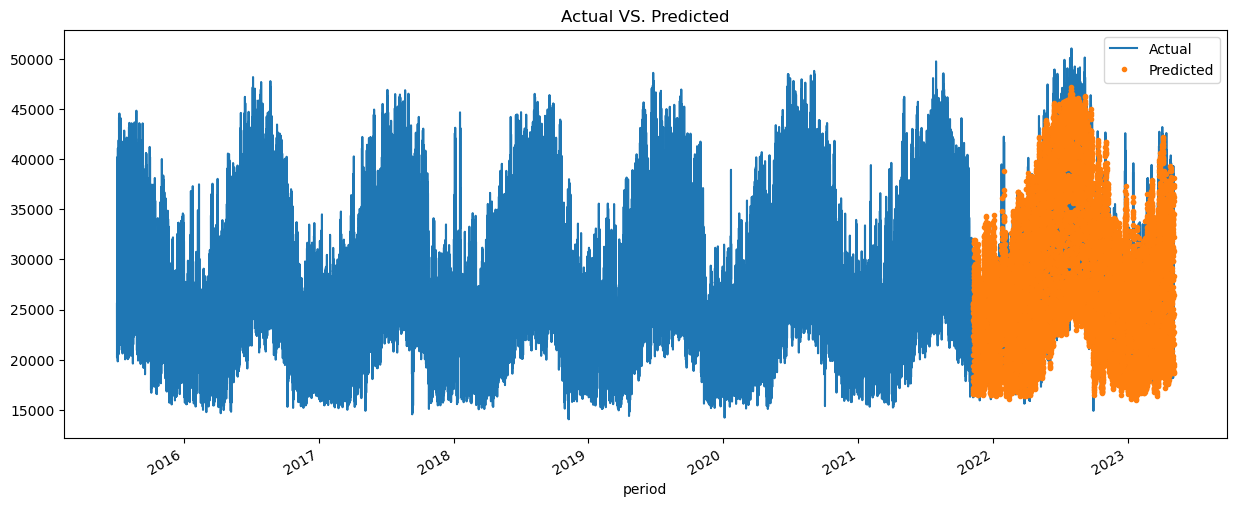

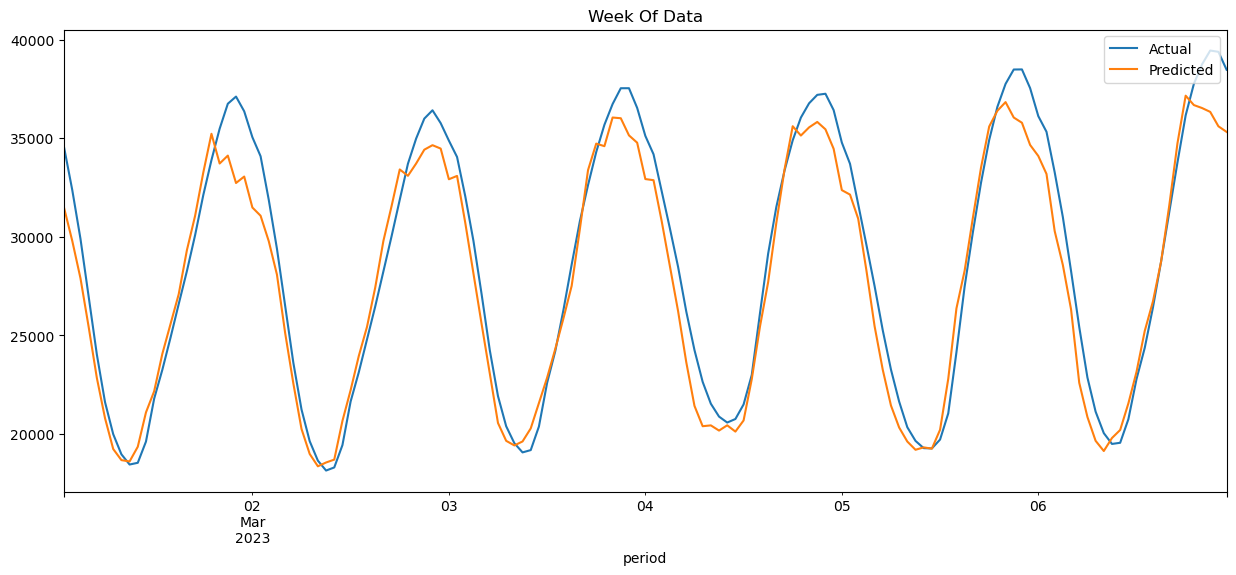

number of features seen during fit: 83


In [36]:
with joblib.parallel_backend('dask'):
    mod_fl = run_model(df_fl)

Binning 0.018 GB of training data: 0.075 s
Binning 0.002 GB of validation data: 0.003 s
Fitting gradient boosted rounds:
[1/433] 1 tree, 60 leaves, max depth = 10, train loss: 1629.44041, val loss: 1607.19687, in 0.130s
[2/433] 1 tree, 60 leaves, max depth = 9, train loss: 1489.08936, val loss: 1473.29883, in 0.074s
[3/433] 1 tree, 60 leaves, max depth = 9, train loss: 1368.00209, val loss: 1356.66836, in 0.090s
[4/433] 1 tree, 60 leaves, max depth = 9, train loss: 1261.33353, val loss: 1251.68646, in 0.089s
[5/433] 1 tree, 60 leaves, max depth = 9, train loss: 1168.43631, val loss: 1161.73624, in 0.064s
[6/433] 1 tree, 60 leaves, max depth = 8, train loss: 1082.20548, val loss: 1077.88257, in 0.154s
[7/433] 1 tree, 60 leaves, max depth = 9, train loss: 1006.06583, val loss: 1002.72622, in 0.071s
[8/433] 1 tree, 60 leaves, max depth = 9, train loss: 937.13196, val loss: 935.89719, in 0.114s
[9/433] 1 tree, 60 leaves, max depth = 10, train loss: 874.76654, val loss: 874.15750, in 0.088s

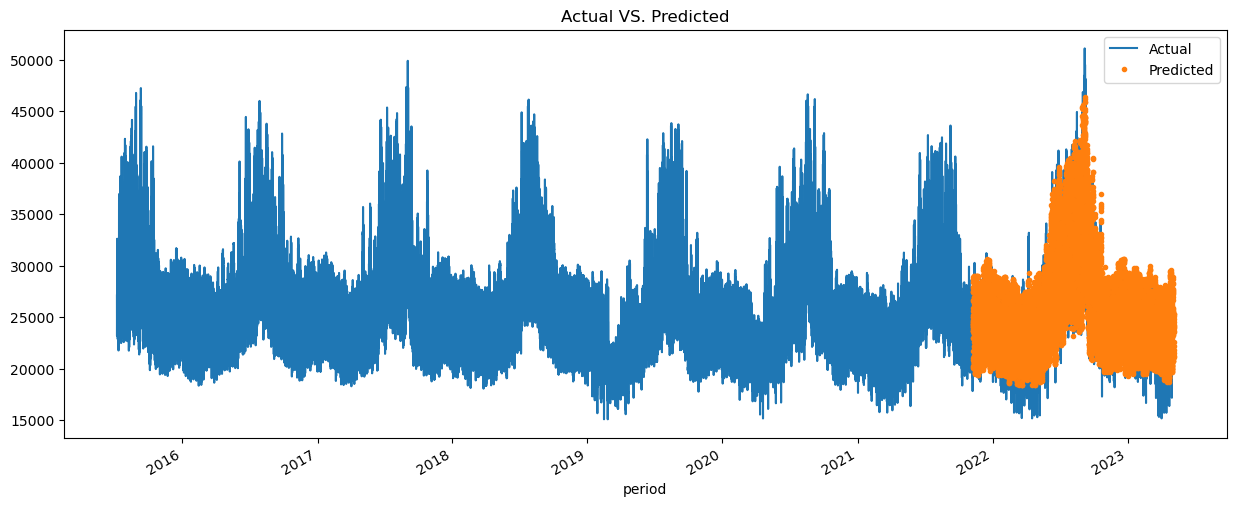

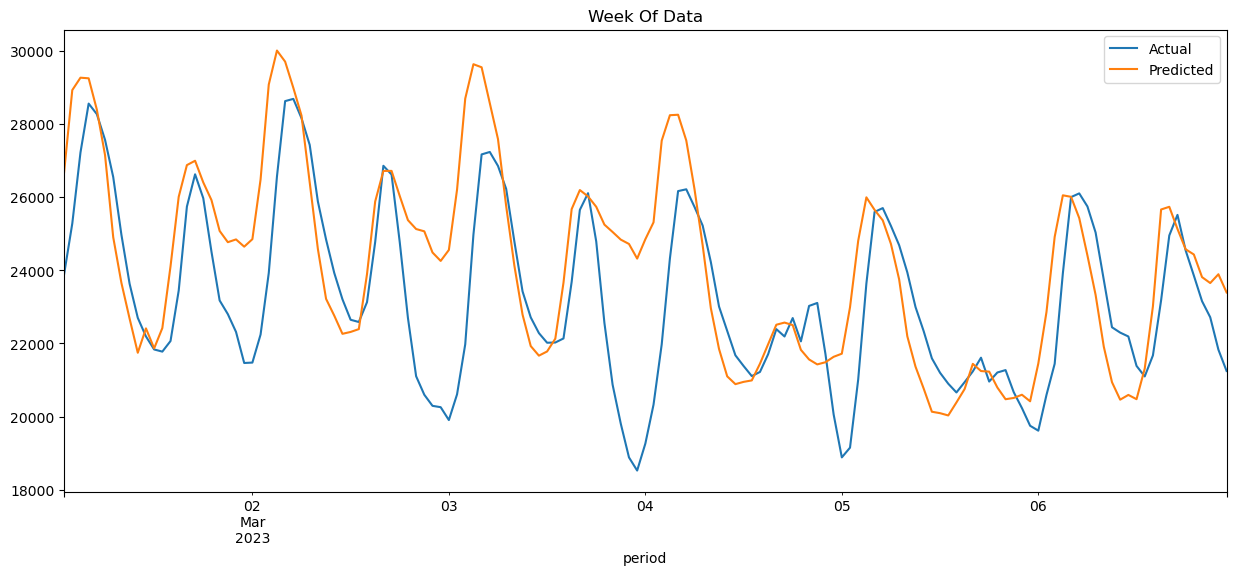

number of features seen during fit: 83


In [37]:
mod_ca = run_model(df_ca)